# Nuggets and `gap`

## Pedro A. García Sánchez (Universidad de Granada)

The problem is simple. You want to buy a certain amount of nuggets, and the store offers boxes of 6, 9 and 20 (as it was in MacDonnald's sometime in the last century; nowadays the boxes are not so generous). You actually want to have the exact amount of Nuggets you want to eat, no one above no one below. So for instance, you cannot buy four nuggets, not 10. But you have several ways to buy 18 nuggets: three boxes of six, or two boxes of nine.

We want to visualize first in how many ways can we buy a certain amount of Nuggets. To this end we will use the [`gap`](https://www.gap-system.org) function `NrRestrictedPartitions` and the `gap` package [`jupyterviz`](https://nathancarter.github.io/jupyterviz/). We will also give some hints on how to use [`francy`](https://gap-packages.github.io/francy/). 

Notice that the ammounts that we correspond with finite sums of integers in the set $\{6,9,20\}$, and thus we are talking about the semigroup $\langle 6,9,20\rangle$. We will use `numericalsgps` to work with numerical semigroups.

If you want to know more about nuggets and numerical semigroups, please refer to this [book chapter](https://link.springer.com/chapter/10.1007/978-3-030-37853-0_6), this [paper](https://www.tandfonline.com/doi/abs/10.1080/0025570X.2018.1515559?journalCode=umma20) and this [manuscript](https://arxiv.org/abs/1912.04494).

In [1]:
LoadPackage("francy");

true

In [2]:
LoadPackage("jupyterviz");

true

In [3]:
LoadPackage("numericalsgps");

true

Let us start by showing how many ways of buying Nuggets do we have in the range $\{0,\ldots,50\}$.

In [4]:
Plot([0..50], x->NrRestrictedPartitions(x,[6,9,20]), 
 rec(
title := "Different ways to buy this many Nuggets",
          xaxis := "n",
yaxis := "number of expressions of n in terms of the boxes", 
xaxis := "number of Nuggets, n",
type:="bar"
      ));

Clearly for elements outside $\langle 6,9,20\rangle$ there will be no possible choice of boxes to get that specific amount of nuggets.

In [7]:
S:=NumericalSemigroup(6,9,20);

Numerical semigroup with 3 generators

In [8]:
realizable:=Intersection(S,[0..50]);

[ 0, 6, 9, 12, 15, 18, 20, 21, 24, 26, 27, 29, 30, 32, 33, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50 ]

The amounts of nuggets that we cannot buy with this box offer are precisely the gaps of $S$.

In [9]:
Gaps(S);

[ 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 22, 23, 25, 28, 31, 34, 37, 43 ]

We will now overprint to the above bar diagram the minimum number of boxes required to obtain the dessired number of Nuggets. 

In [51]:
sizes:=[6,9,20];;
realizable:=Intersection(S,[0..100]);;
Plot([realizable, x->NrRestrictedPartitions(x,sizes), 
 rec(
title := "Different ways to buy this many Nuggets",
          xaxis := "n",
yaxis := "number of expressions of n in terms of the boxes", 
xaxis := "number of Nuggets, n",
type:="bar"
)], 
[realizable, x->Minimum(List(RestrictedPartitions(x,sizes),Length)), 
 rec(
type:="line", name:="min # boxes",
)],
[realizable, x->Maximum(List(RestrictedPartitions(x,sizes),Length)), 
 rec(
type:="line", name:="max # boxes",
)]
);

Let us have a closer look at the number of ways one can buy 150 nuggets.

In [61]:
p:=RestrictedPartitions(150,sizes);;
ls:=List(p,Length);;
Plot(Set(ls),x->Length(Filtered(ls,l->l=x)), rec(type:="pie", height:=500, 
title:="Classifying the number of different ways to buy 150 Nuggets, depending on the number of boxes needed"));

In [55]:
Plot(Set(ls),x->Length(Filtered(ls,l->l=x)), rec(xaxis:="Number of boxes needed for 150 nuggets", 
yaxis:="# possibilities"));

In [56]:
p;

[ [ 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6 ], [ 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6 ], [ 20, 20, 20, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6 ], [ 20, 20, 20, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9 ], [ 20, 20, 20, 20, 20, 20, 6, 6, 6, 6, 6 ], [ 20, 20, 20, 20, 20, 20, 9, 9,

Let us illustrate a naïve way to determine all possible ways to buy $n$ nuggets with boxes of sizes $\{s_1,\ldots,s_k\}$. The idea is quite simple, and we can draw it in a tree. We discriminate the possible ways depending on which we use the box of size $s_1$ or not, that is, $n\in\langle s_1,\ldots,s_k\}$ if either $n-s_1\in\langle s_1,\ldots,s_k\rangle$ or $n\in\langle s_2,\ldots, s_k\rangle$ (and proceed recursively). 

If in this process we reach a negative integer, we stop, and if we arrive to zero, then we trace the boxes we have used. We will draw this leafs of the tree as a square, and when hovering with the mouse over them, we will show the boxes used to get $n$ nuggets.

In [57]:
treefrancy:=function(n,sizes)
    local l, sons, t,  ps, canvas, graphTree,shpr;

    sons:=function(m,lm,szs,shpm)
        local ns,shp;
        if m<0 then 
            return;
        fi;
        ns:=Length(szs);
        if ns=0 then 
            return;
        fi;
        if m=szs[1] then 
            shp:=Shape(ShapeType!.SQUARE, String(0));
            SetSize(shp,5);
            Add(graphTree,shp);
            SetParentShape(shp,shpm);
            Add(shp,FrancyMessage(String(Concatenation(lm,[szs[1]]))));
            Add(ps,Concatenation(lm,[szs[1]]));
        fi;
        if (m-szs[1]>0) then
            shp:=Shape(ShapeType!.CIRCLE, String(m-szs[1]));
            SetSize(shp,5);
            Add(graphTree,shp);
            SetParentShape(shp,shpm);
            Add(ps,Concatenation(lm,[szs[1]]));
            sons(m-szs[1],Concatenation(lm,[szs[1]]),szs,shp);
        fi;
        sons(m,lm,szs{[2..ns]},shpm);
    end;

    t:=[];
    l:=[];
    ps:=[];
    graphTree := Graph(GraphType.TREE);
    SetCollapsed(graphTree,false);
    shpr:=Shape(ShapeType!.CIRCLE, String(n));
    SetSize(shpr,5);
    #Add(shpr,FrancyMessage(Concatenation(String(n)," ",String(l))));
    Add(graphTree,shpr);
    canvas:=Canvas("Boxes");
    SetTexTypesetting(canvas, true);
    Add(canvas,graphTree);
    sons(n,l,sizes,shpr);
    return Draw(canvas);
end;


function( n, sizes ) ... end

In [58]:
treefrancy(30,sizes);

In [41]:
S:=NumericalSemigroup(sizes);

Numerical semigroup with 3 generators

There are other ways to construct all possible combinations of boxes to reach the dessired ammount of nuggets. We can think about $\langle 6, 9 , 20\rangle$ as an object generated by three elements together with some relations among these generators (relations). We can use `MinimalPresentation` to obtain these relations. 

In [89]:
mps:=MinimalPresentation(S);

[ [ [ 1, 6, 0 ], [ 0, 0, 3 ] ], [ [ 3, 0, 0 ], [ 0, 2, 0 ] ] ]

One may think about these relations as trades. So fors instance, one can change tree boxes of size six with two of size nine.

Let us write a graph depicting all trades performed starting from a known possible choice of boxes.

In [98]:
trades:=function(f,tds)
    local nonneg, sons, edges, vertices;

    nonneg:=function(l)
        return ForAll(l, x-> x>=0);
    end;

    sons:= function(fc)
        local ptds, t,fcs;
        if not(nonneg(fc)) then
            return;
        fi;
        ptds:=Filtered(tds, t->nonneg(fc-t[1]));
        for t in ptds do
            fcs:=fc-t[1]+t[2];
            Add(vertices,fcs);
            Add(edges,[fc,fcs]);
            sons(fcs);
        od;
    end;
    
    vertices:=[f];
    edges:=[];
    sons(f);

    return PlotGraph(vertices, edges, rec(directed:=true, layout:="cose", arrowscale:=2));
end;

function( f, tds ) ... end

In [99]:
trades([20,0,0], mps);

There are several `gap` packages that offer procedures that output graphs in `dot` language. An example of these is `DotFactorizationGraph` that shows the set of combinations of a nonnegative integer in terms of a given set of nonnegative integers depicted in a graph: the vertices are labelled with the different combinations, and in the edges shows the "distance" between factorizations. In red a minimal spanning tree is highlighted.

In order to make these outputs visible in the notebook one can use `JupyterSplashDot`.

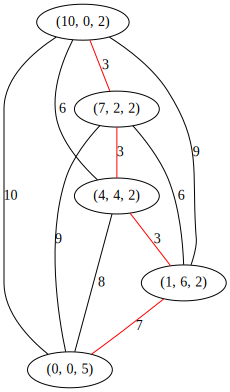

In [100]:
JupyterSplashDot(DotFactorizationGraph(FactorizationsIntegerWRTList(100,sizes)));